<a href="https://colab.research.google.com/github/RupamManna68/ML/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns

In [2]:
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
car_dataset.shape

(4340, 8)

In [4]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
counts = car_dataset[['fuel','seller_type','transmission','owner']].astype(str).apply(lambda x:x.value_counts(dropna=False)).T.stack()

In [15]:
print(counts)

fuel          CNG                       40.0
              Diesel                  2153.0
              Electric                   1.0
              LPG                       23.0
              Petrol                  2123.0
seller_type   Dealer                   994.0
              Individual              3244.0
              Trustmark Dealer         102.0
transmission  Automatic                448.0
              Manual                  3892.0
owner         First Owner             2832.0
              Fourth & Above Owner      81.0
              Second Owner            1106.0
              Test Drive Car            17.0
              Third Owner              304.0
dtype: float64


In [16]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [18]:
car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4},
                     'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2},
                     'transmission':{'Manual':0,'Automatic':1},
                     'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}
                     },inplace=True)

/tmp/ipython-input-18-2339177846.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4},


In [19]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [20]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
training_data_prediction = model.predict(X_train)

In [26]:
score1 = metrics.r2_score(Y_train,training_data_prediction)
print(score1)

0.43922410637048914


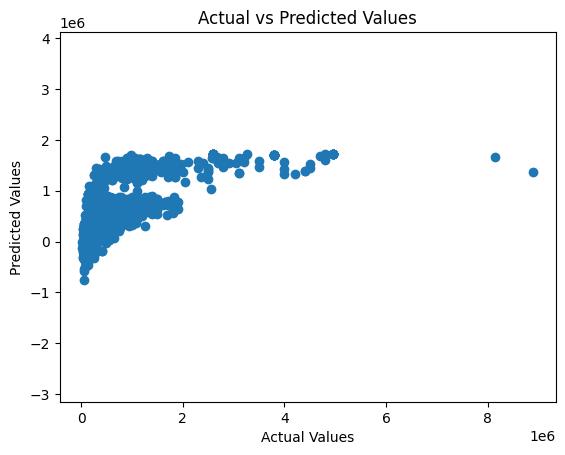

In [32]:
plt.scatter(Y_train,training_data_prediction)
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()